# COVID-19 World Vaccination Progress
Daily and Total Vaccination for COVID-19 in the World from Our World in Data
(Gabriel Preda)

**Inspiration**

Which country is using what vaccine?

In which country the vaccination programme is more advanced?

Where are vaccinated more people per day? But in terms of percent from entire population ?

# Load and Explor Data (EDA)

In [1]:
# linear algebra
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
from datetime import timedelta

import plotly.express as px
import plotly.graph_objects as go
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv


In [2]:
#country_vaccinations.csv
vaccinations_data = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')

#country_vaccinations_by_manufacturer.csv
vaccinations_by_mf = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv')

In [3]:
#country_vaccinations.csv
vaccinations_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [4]:
#country_vaccinations_by_manufacturer.csv
vaccinations_by_mf.tail()

,location,date,vaccine,total_vaccinations
8056,Uruguay,2021-06-26,Pfizer/BioNTech,921875
8057,Uruguay,2021-06-26,Sinovac,2808652
8058,Uruguay,2021-06-27,Oxford/AstraZeneca,43128
8059,Uruguay,2021-06-27,Pfizer/BioNTech,921875
8060,Uruguay,2021-06-27,Sinovac,2808652


In [5]:
#data.isnull().sum(axis=0)
# Get the null values use isnull() 
null_values = vaccinations_data.isnull().sum()
null_values

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     11929
people_vaccinated                      12725
people_fully_vaccinated                15473
daily_vaccinations_raw                 14574
daily_vaccinations                       276
total_vaccinations_per_hundred         11929
people_vaccinated_per_hundred          12725
people_fully_vaccinated_per_hundred    15473
daily_vaccinations_per_million           276
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [6]:
vaccinations_per_country = vaccinations_data.groupby('country')['daily_vaccinations'].sum()
print(vaccinations_per_country)

country
Afghanistan           731028.0
Albania               893292.0
Algeria              2437370.0
Andorra                57677.0
Angola               1395937.0
                       ...    
Wales                3777147.0
Wallis and Futuna       8275.0
Yemen                 234640.0
Zambia                149991.0
Zimbabwe             1151464.0
Name: daily_vaccinations, Length: 217, dtype: float64


In [7]:
#top 5 country with total vaccinations


vaccinations_per_country = vaccinations_data.groupby('country')['total_vaccinations'].sum().sort_values(ascending=False).head(5)
vaccinations_per_country.head(5)


country
China             4.390531e+10
United States     2.742481e+10
India             1.653679e+10
United Kingdom    6.258558e+09
England           5.219554e+09
Name: total_vaccinations, dtype: float64

Text(0, 0.5, 'Country')

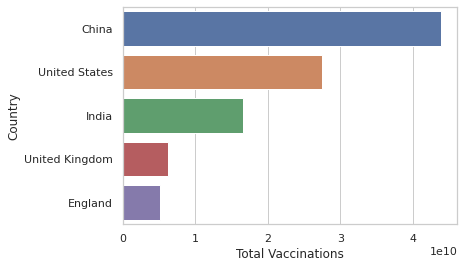

In [8]:

#bargraph
#plt.figure(figsize=(7,7))
sns.set_theme(style="whitegrid")
sns.barplot(x=vaccinations_per_country.values, y=vaccinations_per_country.index, orient='h')
plt.xlabel("Total Vaccinations")
plt.ylabel("Country")


In [9]:
vaccinations_by_mf.vaccine.value_counts 

<bound method IndexOpsMixin.value_counts of 0          Johnson&Johnson
1                  Moderna
2       Oxford/AstraZeneca
3          Pfizer/BioNTech
4          Johnson&Johnson
               ...        
8056       Pfizer/BioNTech
8057               Sinovac
8058    Oxford/AstraZeneca
8059       Pfizer/BioNTech
8060               Sinovac
Name: vaccine, Length: 8061, dtype: object>

# Worldwide total vaccinations by manufacturer

In [10]:
# Worldwide vaccine count per manufacturer
# am using mean instead of sum since there is 2 doses
vaccine_tot_per_mf = vaccinations_by_mf.groupby('vaccine')['total_vaccinations'].mean().\
                to_frame().reset_index()

vaccine_tot_per_mf.sort_values(by=['total_vaccinations'], ascending=True)


,vaccine,total_vaccinations
0,CanSino,1.760560e+05
7,Sputnik V,4.896096e+05
1,Johnson&Johnson,8.487588e+05
3,Oxford/AstraZeneca,1.132560e+06
5,Sinopharm/Beijing,1.162825e+06
6,Sinovac,5.992518e+06
2,Moderna,6.117343e+06
4,Pfizer/BioNTech,9.413850e+06


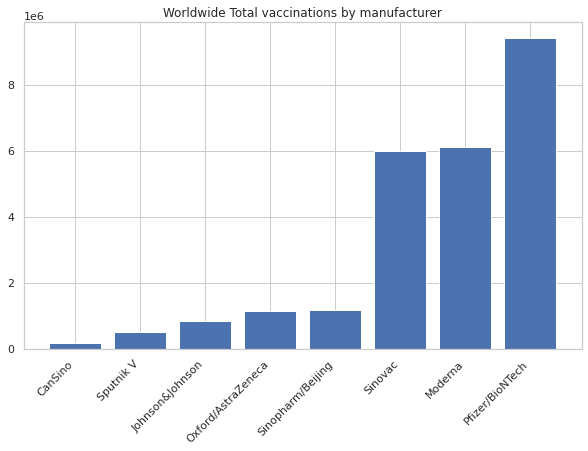

In [11]:
# country_vaccinations_by_manufacturer.csv dataset
vaccine_tot_per_mf= vaccine_tot_per_mf.sort_values('total_vaccinations')
plt.figure(figsize=(10, 6))
plt.bar(vaccine_tot_per_mf['vaccine'], vaccine_tot_per_mf['total_vaccinations'], )
minimum = 0
maximum = vaccine_tot_per_mf['total_vaccinations'].max
plt.title("Worldwide Total vaccinations by manufacturer")
#plt.xlabel('vaccine')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
alt.Chart(vaccine_tot_per_mf).mark_bar().encode(
    alt.X('vaccine:N', sort='-y', title='vaccinations manufacturer'),
    alt.Y('total_vaccinations:Q'),
    alt.Color('vaccine:N'),
    alt.Tooltip(['vaccine', 'total_vaccinations'])
).properties(
    width = 600,
    height = 450
)

alt.Chart(...)

# Sweden 

In [13]:
vaccinations_swe = vaccinations_data[vaccinations_data['country'] == 'Sweden']


In [14]:
vaccinations_by_mf_swe = vaccinations_by_mf[vaccinations_by_mf['location'] == 'Sweden']

vaccinations_by_mf_swe = vaccinations_by_mf_swe.groupby('vaccine')['total_vaccinations'].mean().\
                to_frame().reset_index()

vaccinations_by_mf_swe.sort_values(by=['total_vaccinations'], ascending=True)


,vaccine,total_vaccinations
0,Moderna,2.510582e+05
1,Oxford/AstraZeneca,5.026350e+05
2,Pfizer/BioNTech,1.954288e+06


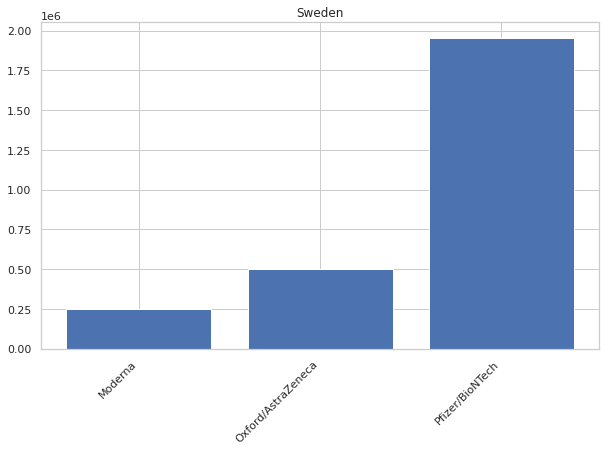

In [15]:
# Total vaccinations by manufacturer at Sweden
vaccinations_by_mf_swe= vaccinations_by_mf_swe.sort_values('total_vaccinations')
plt.figure(figsize=(10, 6))
plt.bar(vaccinations_by_mf_swe['vaccine'], vaccinations_by_mf_swe['total_vaccinations'], )
minimum = 0
#maximum = vaccinations_by_mf_swe['total_vaccinations'].max
#plt.ylim(0,29000000000)
plt.title("Sweden")
#plt.xlabel('vaccine')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sweden / USA / United Arab Emirates 
**vaccines used**

In [16]:
#vaccines used Sweden / USA / United Arab Emirates 
vaccinations_ar = vaccinations_data[vaccinations_data
                                    ['country'].isin(['Sweden',
                                                      'United Arab Emirates', 'United States'])]                           

vaccinations_ar = vaccinations_ar[['country', 'vaccines']]

vaccinations_ar = vaccinations_ar.groupby(["country", "vaccines"]).count()

vaccinations_ar

,
country,vaccines
Sweden,"Oxford/AstraZeneca, Pfizer/BioNTech"
United Arab Emirates,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V"
United States,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


Johnson&Johnson used at USA only. it is not used at Sweden or UAE.

****

Please consider upvoting if you find it useful to you.

Thanks.